In [2]:
!pip install --upgrade pip
!pip install pyathena

  Using cached pip-24.0-py3-none-any.whl.metadata (3.6 kB)
Using cached pip-24.0-py3-none-any.whl (2.1 MB)
  Attempting uninstall: pip
    Found existing installation: pip 23.3.1
    Uninstalling pip-23.3.1:
      Successfully uninstalled pip-23.3.1


In [3]:
#Upgrade de la version de seaborn para poder hacer graficos mas facil 
!pip install seaborn==0.12.2

In [4]:
#Libraries
from pyathena import connect
import pandas as pd
import datetime as dt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime


In [5]:
# DB Setting
bucket_name = 's3://viamericas-datalake-dev-us-east-1-283731589572-athena/'
origin_name = 'AwsDataCatalog'
database_name = 'viamericas'
tabla = 'receiver'
tabla1 = 'receiver_fraud'


In [8]:
#Connection

conn = connect(s3_staging_dir=f'{bucket_name}queryresults/',
               region_name='us-east-1')
df_branch = pd.read_sql(f'SELECT id_branch, min(DATE_RECEIVER) primer, max(DATE_RECEIVER) ultima, COUNT(*) transacciones FROM {origin_name}.{database_name}.{tabla} GROUP BY id_branch;', conn)
df_branch_fraud = pd.read_sql(f'SELECT r.id_branch, min(r.DATE_RECEIVER) primer, max(r.DATE_RECEIVER) ultima, COUNT(*) transacciones FROM {origin_name}.{database_name}.{tabla1} rf INNER JOIN {origin_name}.{database_name}.{tabla} r ON rf.ID_BRANCH = r.ID_BRANCH AND rf.ID_RECEIVER = r.ID_RECEIVER GROUP BY r.id_branch;', conn)

#, COUNT(distinct DATE_TRUNC(¨day¨, DATE_RECEIVER)) dias

/tmp/ipykernel_99/1694804894.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_branch = pd.read_sql(f'SELECT id_branch, min(DATE_RECEIVER) primer, max(DATE_RECEIVER) ultima, COUNT(*) transacciones FROM {origin_name}.{database_name}.{tabla} GROUP BY id_branch;', conn)
/tmp/ipykernel_99/1694804894.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_branch_fraud = pd.read_sql(f'SELECT r.id_branch, min(r.DATE_RECEIVER) primer, max(r.DATE_RECEIVER) ultima, COUNT(*) transacciones FROM {origin_name}.{database_name}.{tabla1} rf INNER JOIN {origin_name}.{database_name}.{tabla} r ON rf.ID_BRANCH = r.ID_BRANCH AND rf.ID_RECEIVER = r.ID_RECEIVER GROUP BY r.id_branch;', conn)


In [9]:
df_branch.head()

,id_branch,primer,ultima,transacciones
0,A17065,2020-02-12 18:55:51.497,2020-09-30 19:52:24.913,5746
1,A19555,2020-06-13 16:47:21.327,2024-02-03 15:17:28.450,29776
2,A01180,2020-02-13 12:15:34.643,2021-06-13 20:53:11.617,719
3,A15289,2020-02-14 14:45:32.567,2024-02-03 18:06:05.463,5291
4,A19484,2020-06-10 17:08:38.337,2024-02-03 18:40:52.437,6466


In [15]:
df_branch['dif_dias'] = (df_branch['ultima'] - df_branch['primer']).dt.days
df_branch_fraud['dif_dias'] = (df_branch_fraud['ultima'] - df_branch_fraud['primer']).dt.days

In [16]:
df_branch.head()

,id_branch,primer,ultima,transacciones,dif_dias
0,A17065,2020-02-12 18:55:51.497,2020-09-30 19:52:24.913,5746,231
1,A19555,2020-06-13 16:47:21.327,2024-02-03 15:17:28.450,29776,1329
2,A01180,2020-02-13 12:15:34.643,2021-06-13 20:53:11.617,719,486
3,A15289,2020-02-14 14:45:32.567,2024-02-03 18:06:05.463,5291,1450
4,A19484,2020-06-10 17:08:38.337,2024-02-03 18:40:52.437,6466,1333


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

<AxesSubplot:xlabel='transacciones', ylabel='count'>

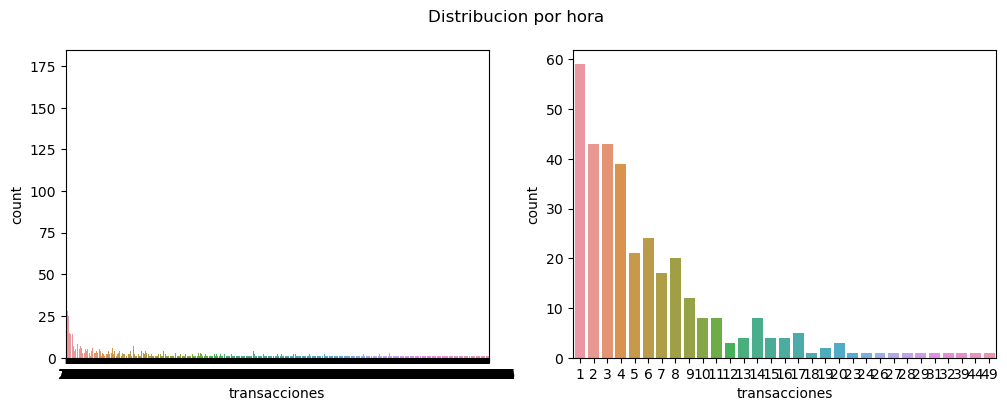

In [17]:
fig, axs = plt.subplots(1,2,figsize = (12, 4))
fig.suptitle('Distribucion por hora')
sns.countplot(data = df_branch, x = 'transacciones', ax = axs[0])
sns.countplot(data = df_branch_fraud, x ='transacciones', ax = axs[1])